In [1]:
!module swap pyrecon/mpi pyrecon/main


The following have been reloaded with a version change:
  1) pyrecon/mpi => pyrecon/main



In [1]:
import sys
sys.path.insert(0, '/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/pyrecon/main/lib/python3.10/site-packages/pyrecon')
import pyrecon
print(pyrecon.__file__)

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/pyrecon/mpi/lib/python3.10/site-packages/pyrecon/__init__.py


In [1]:
import fitsio
from pathlib import Path
import argparse
import numpy as np
from acm.estimators.galaxy_clustering.density_split import DensitySplit
from acm import setup_logging
from cosmoprimo.fiducial import AbacusSummit


def get_hod_positions(input_fn, los='z'):
    hod = fitsio.read(input_fn)
    pos = np.c_[hod['X'], hod['Y'], hod['Z']]
    hubble = 100 * cosmo.efunc(redshift)
    scale_factor = 1 / (1 + redshift)
    if los == 'x':
        pos[:, 0] += hod['VX'] / (hubble * scale_factor)
    elif los == 'y':
        pos[:, 1] += hod['VY'] / (hubble * scale_factor)
    elif los == 'z':
        pos[:, 2] += hod['VZ'] / (hubble * scale_factor)
    return pos

redshift = 0.5
los = 'z'

# setup_logging()
ds = DensitySplit(boxsize=2000, boxcenter=2000/2, cellsize=4.0)

hod_dir = f'/pscratch/sd/e/epaillas/emc/hods/cosmo+hod/z0.5/yuan23_prior/c000_p000/seed0/'
hod_fn = Path(hod_dir) / f'hod466.fits'

hod_positions = get_hod_positions(hod_fn, los=los)

ds.assign_data(positions=hod_positions, wrap=True, clear_previous=True)
ds.set_density_contrast(smoothing_radius=10, save_wisdom=True)
ds.set_quantiles(nquantiles=5, query_method='randoms')

ImportError: cannot import name 'RealMesh' from 'pyrecon' (/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/code/pyrecon/mpi/lib/python3.10/site-packages/pyrecon/__init__.py)

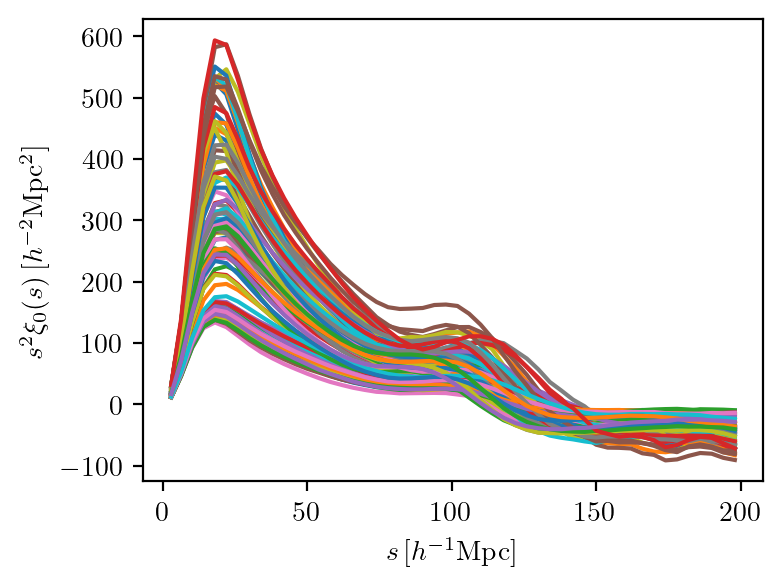

In [29]:
from astropy.stats import sigma_clip
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


n_hod = 1
quantiles = [4,]
ells = (0,)
statistic = 'quantile_data_correlation'
cosmos = list(range(0, 5)) + list(range(13, 14)) + list(range(100, 127)) + list(range(130, 182))
# cosmos = list(range(1))


fig, ax = plt.subplots(figsize=(4, 3))

for cosmo in cosmos:
    multipoles_hod = []
    for hod in range(n_hod):
        data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/dsc_conf/cosmo+hod/z0.5/yuan23_prior/c{cosmo:03}_ph000/seed0/'
        data_fn = Path(data_dir) / f'{statistic}_hod{hod:03}.npy'
        data = np.load(data_fn, allow_pickle=True)

        multipoles_quantiles = []
        for q in quantiles:
            result = data[q][::4]
            s, multipoles = result(ells=ells, return_sep=True)
            multipoles_quantiles.append(np.concatenate(multipoles))
        multipoles_hod.append(np.concatenate(multipoles_quantiles))
        # multipoles_all.append(multipoles[ell//2])
        ax.plot(s, s**2*multipoles_hod[hod])
        
    
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.show()

# multipoles_hod = np.array(multipoles_hod)
# # print(multipoles_all.shape)
# mask = sigma_clip(multipoles_hod, sigma=6, axis=0, masked=True).mask
# mask = np.all(~mask, axis=1)

# print(np.shape(mask))
# print(np.where(~mask))

# # # print(np.all(~multipoles_all.mask, axis=1))

# multipoles_hod = multipoles_hod[mask]
# # print(multipoles_all.shape)
# fig, ax = plt.subplots(figsize=(4, 3))
# for i in range(len(multipoles_hod)):
#     ax.plot(multipoles_hod[i])
    
# # ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
# # ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
# plt.show()
# # plt.show()

# # data_dir = '/pscratch/sd/e/epaillas/emc/training_sets/density_split/quantile_data_correlation/z0.5/yuan23_prior/c000_ph000/seed0'
# # data_fn = Path(data_dir) / 'quantile_data_correlation_hod031.npy'
# # data = np.load(data_fn, allow_pickle=True)

# # fig, ax = plt.subplots()
# # for i in range(5):
# #     result = data[i][::4]
# #     s, multipoles = result(ells=(0, 2, 4), return_sep=True)
# #     ax.plot(s, s**2*multipoles[1])
# # plt.show()

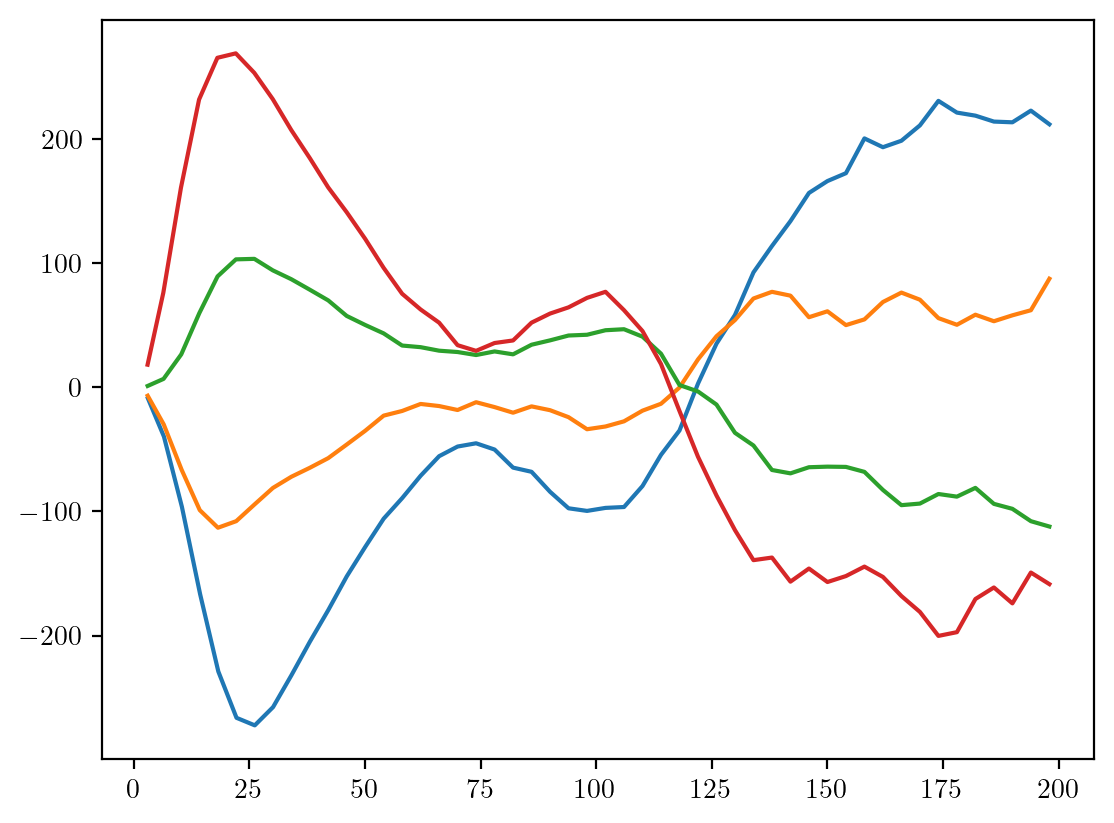

In [153]:
fig, ax = plt.subplots()

data_dir = Path('/pscratch/sd/e/epaillas/emc/covariance_sets/density_split/quantile_data_correlation/z0.5/yuan23_prior')
data_fn = data_dir / 'quantile_data_correlation_ph3000_hod466.npy'
data = np.load(data_fn, allow_pickle=True)
print(data)
multipoles_quantiles = []
for q in quantiles:
    s, multipoles = data[q][::4](ells=ells, return_sep=True)
    multipoles_quantiles.append(np.concatenate(multipoles))
    
    ax.plot(s, s**2*multipoles[0])
    
plt.show()


(497, 400)
[0.00124421 0.00100918 0.00128081 0.00185855 0.00277829 0.0037643
 0.00453683 0.00491111 0.00501952 0.00497892 0.00480169 0.00459485
 0.00438008 0.00414668 0.00393183 0.00370228 0.00346848 0.0032716
 0.00308032 0.00291578 0.00277516 0.0026335  0.00253314 0.00243211
 0.00234062 0.00225298 0.00219652 0.00214341 0.00209116 0.00202601
 0.00195373 0.00187366 0.00180239 0.00173094 0.0016664  0.00158926
 0.0015277  0.00146027 0.00139679 0.00133088 0.00126813 0.00121095
 0.00116752 0.00111977 0.00108213 0.00104922 0.00101722 0.00099887
 0.0009856  0.00096652 0.00206657 0.00096398 0.00083937 0.00110805
 0.00166642 0.00259083 0.0034943  0.0043065  0.00487415 0.00521389
 0.00538222 0.00549565 0.00557001 0.00561556 0.00553247 0.00546913
 0.00542825 0.00533141 0.00532643 0.00524442 0.00519175 0.00511583
 0.00505802 0.00498498 0.00486977 0.00476735 0.00465065 0.00456367
 0.00445436 0.00436512 0.00429073 0.00422651 0.00414802 0.00408085
 0.00400931 0.00392143 0.00381523 0.0037103  0.003622

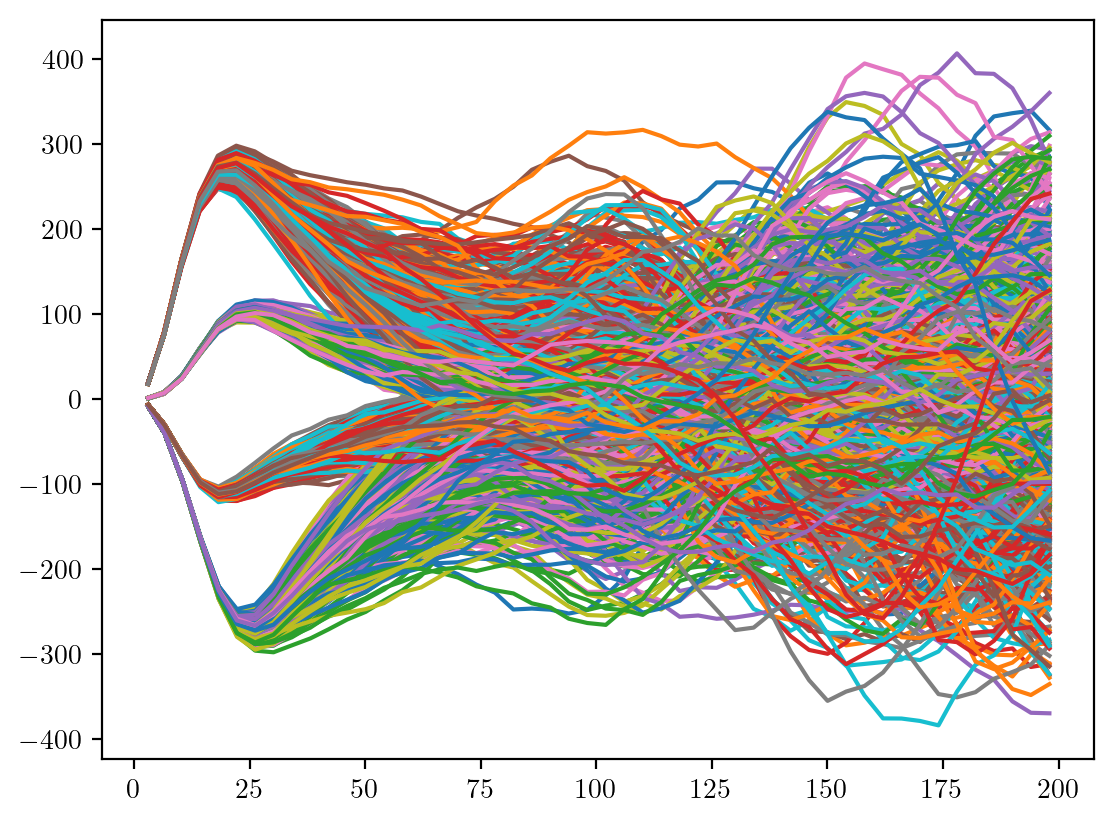

In [160]:
fig, ax = plt.subplots()

def read_covariance(quantiles=(0, 1, 3, 4), ells=(0, 2)):
    data_dir = Path('/pscratch/sd/e/epaillas/emc/covariance_sets/density_split/quantile_data_correlation/z0.5/yuan23_prior')
    data_fns = list(data_dir.glob('quantile_data_correlation_ph*_hod466.npy'))
    multipoles_phases = []
    for data_fn in data_fns:
        data = np.load(data_fn, allow_pickle=True)
        multipoles_quantiles = []
        for q in quantiles:
            s, multipoles = data[q][::4](ells=ells, return_sep=True)
            ax.plot(s, s**2*multipoles[0])
            multipoles_quantiles.append(np.concatenate(multipoles))
        multipoles_phases.append(np.concatenate(multipoles_quantiles))
    multipoles_phases = np.array(multipoles_phases)
    print(np.shape(multipoles_phases))
    cov = np.cov(multipoles_phases, rowvar=False)
    return 1/ 8 * cov

cov = read_covariance()
print(np.sqrt(np.diag(cov)))
plt.show()

In [9]:
fourier_stats = ['pk', 'dsc_fourier']

statistic = 'tpcf'

any([stat in fourier_stats for stat in statistic.split('+')])

# if any(statistic.split('+') in fourier_stats):
#     print(True)
    


False

Loaded LHC with shape: (8500, 20), (8500, 800)
Loaded covariance with shape: (800, 800)


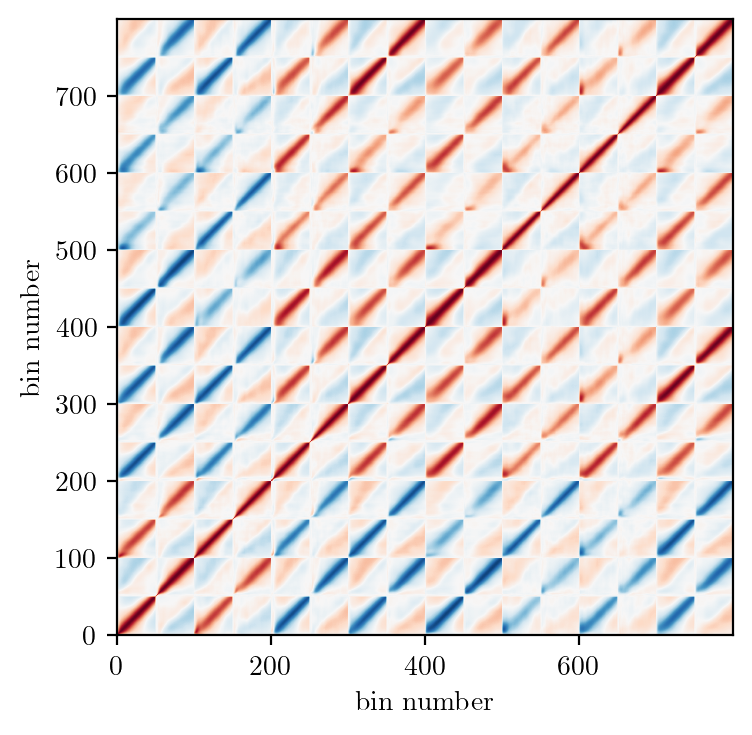

[ 0.02242   0.1134    0.776779  0.9638    0.        2.0328   -1.
  0.       12.85285  14.90241  -2.42158   0.83564   0.32788   0.39661
  1.18575   0.31171   0.27019  -0.96064   0.05306  -0.79937 ]


In [10]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
from sunbird.emulators import FCN
import torch
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def read_lhc(statistic='dsc_conf', return_sep=False):
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/dsc_conf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'{statistic}_lhc.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    lhc_x = data['lhc_x']
    lhc_x_names = data['lhc_x_names']
    lhc_y = data['lhc_y']
    s = data['s']
    if return_sep:
        return s, lhc_x, lhc_y, lhc_x_names
    return lhc_x, lhc_y

def read_covariance():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/dsc_conf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'dsc_conf_lhc.npy'
    y = np.load(data_fn, allow_pickle=True).item()['cov_y']
    prefactor = 1 / 64
    cov = prefactor * np.cov(y, rowvar=False)
    corr = np.corrcoef(y, rowvar=False)
    return cov, corr

covariance_matrix, correlation_matrix = read_covariance()
s, lhc_x, lhc_y, lhc_x_names = read_lhc(return_sep=True)
print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')
print(f'Loaded covariance with shape: {covariance_matrix.shape}')

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(correlation_matrix, origin='lower', cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xlabel('bin number')
ax.set_ylabel('bin number')
plt.show()

# mask outliers
# mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
# mask = np.all(~mask, axis=1)





# lhc_x = lhc_x[mask]
# lhc_y = lhc_y[mask]
# print(f'After sigma clipping: {lhc_x.shape}, {lhc_y.shape}')

print(lhc_x[199])

/pscratch/sd/e/epaillas/emc/trained_models/dsc_conf/cosmo+hod/final/last.ckpt


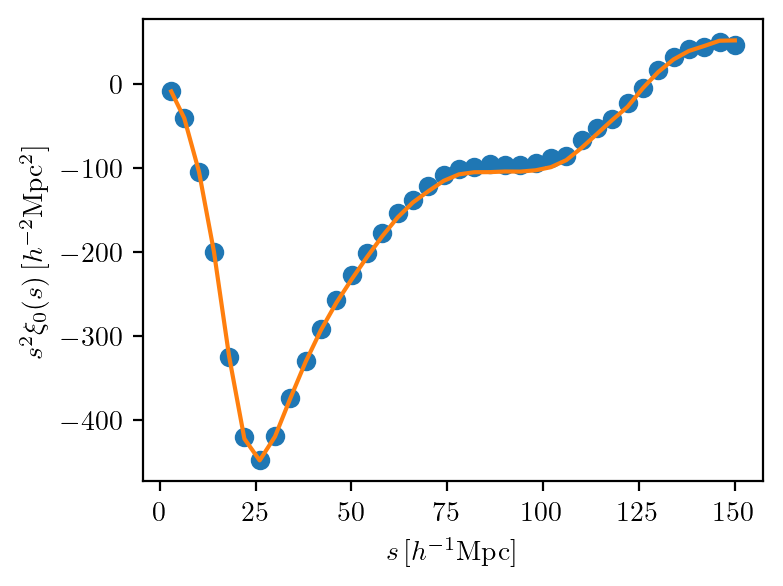

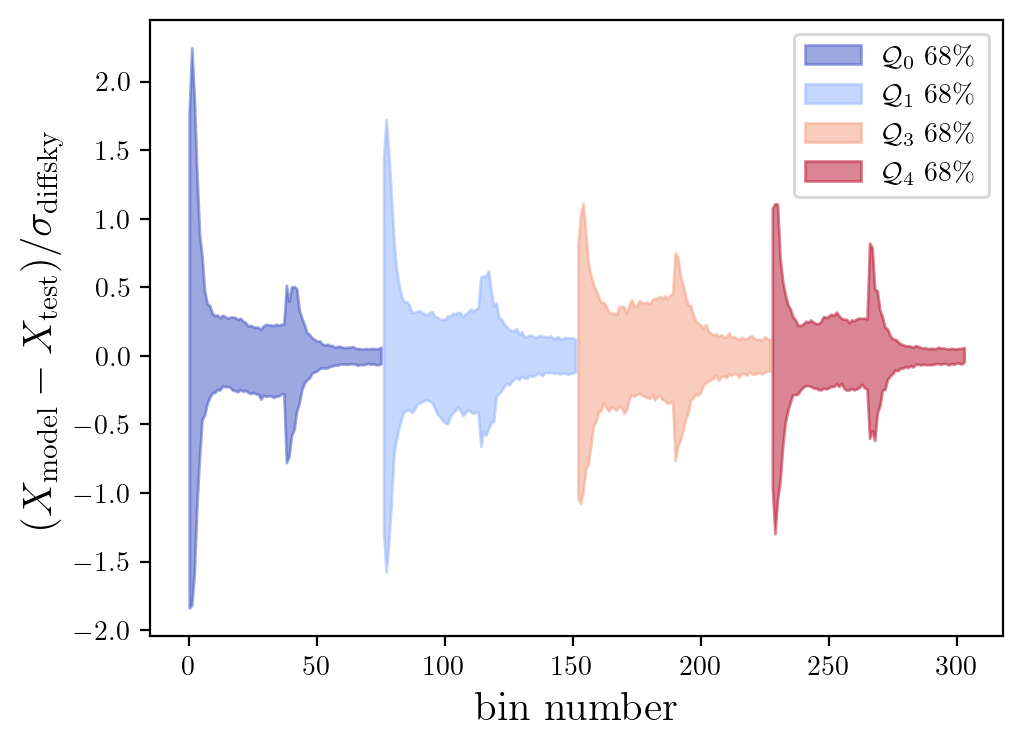

In [20]:
ntot = len(lhc_y)
nstep = int(ntot / 5)
q68_all = []
q95_all = []
emuerr_all = []
emulator_error_all = []
for i in range(1):
    start_idx = i * nstep
    end_idx = (i + 1) * nstep
    idx_train = list(range(0, start_idx)) + list(range(end_idx, ntot))
    idx_test = list(range(start_idx, end_idx))

    lhc_train_x = lhc_x[idx_train]
    lhc_train_y = lhc_y[idx_train]
    lhc_test_x = lhc_x[idx_test]
    lhc_test_y = lhc_y[idx_test]
    
    # checkpoint_fn = f'/pscratch/sd/e/epaillas/emc/trained_models/density_split/jun2_9_leaveout_{i}/last.ckpt'
    checkpoint_fn = f'/pscratch/sd/e/epaillas/emc/trained_models/dsc_conf/cosmo+hod/final/last.ckpt'
    print(checkpoint_fn)
    # checkpoint_fn = glob.glob(f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/silu_leaveout_{i}/*.ckpt')[0]
    model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
    model.eval()
    
    with torch.no_grad():
        pred_test_y = model.get_prediction(torch.Tensor(lhc_test_x))
        pred_test_y = pred_test_y.numpy()
        
    emulator_error = (pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix))
    # emulator_error = (pred_test_y - lhc_test_y)/lhc_test_y
    q68 = np.quantile(emulator_error, [0.16, 0.84], axis=0)
    q95 = np.quantile(emulator_error, [0.025, 0.975], axis=0)
    q99 = np.quantile(emulator_error, [0.005, 0.995], axis=0)
    
    q68_all.append(q68)
    q95_all.append(q95)
    emulator_error_all.append((pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix)))
    # emulator_error_all.append((pred_test_y - lhc_test_y)/lhc_test_y)
    emuerr_all.append(pred_test_y - lhc_test_y)
    
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(s, s**2 * lhc_test_y[0][:len(s)], marker='o', ls='')
    ax.plot(s, s**2 * pred_test_y[0][:len(s)])
    ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
    ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
    plt.show()
    
# q68_all = np.array(q68_all).mean(axis=0)
# q95_all = np.array(q95_all).mean(axis=0)
emulator_error_all = np.concatenate(emulator_error_all)
q68_all = np.quantile(emulator_error_all, [0.16, 0.84], axis=0)
emu_cov = np.cov(emulator_error_all, rowvar=False)
                      
fig, ax = plt.subplots(figsize=(5.5, 4))
cmap = matplotlib.colormaps['coolwarm']

# for i in range(len(emulator_error_all)):
#     ax.plot(list(range(emulator_error.shape[1])), emulator_error_all[i], color='grey', lw=0.2)
# ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')

colors = cmap(np.linspace(0.01, 0.99, 5))
for i, q in enumerate([0, 1, 3, 4]):
    xrange = slice(2 * i * len(s), 2 * (i + 1) * len(s))
    ax.fill_between(list(range(emulator_error.shape[1]))[xrange], q68_all[0][xrange], q68_all[1][xrange],
                    alpha=0.5, label=rf'$\mathcal{{Q}}_{q}\ 68\%$', color=colors[q])
    # ax.fill_between(list(range(emulator_error.shape[1])), q68_all[0], q68_all[1], alpha=0.5, label='68\%', color='C0')
ax.legend()
ax.set_xlabel('bin number', fontsize=15)
ax.set_ylabel('(model - test)/sigma', fontsize=15)
ax.set_ylabel(r'$(X_{\rm model} - X_{\rm test})/\sigma_{\rm diffsky}$', fontsize=15)
# plt.ylim(-0.1,0.1)
# ax.fill_between(list(range(len(s)), q68_all[0], q68_all[1], alpha=0.5, color='crimson'))
plt.show()

# save_dir = '/pscratch/sd/e/epaillas/emc/training_sets/density_split/quantile_data_correlation/z0.5/yuan23_prior/c000_ph000/seed0'
# save_fn = Path(save_dir) / 'quantile_data_correlation_emulator_error.npy'
# np.save(save_fn, np.sqrt(np.diag(covariance_matrix)) * (np.abs(q68[0]) + np.abs(q68[1]))/2)

# fig, ax = plt.subplots()
# # ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')
# ax.plot(list(range(emulator_error.shape[1])), np.sqrt(np.diag(emu_cov)), alpha=0.5, label='68\%', color='C0')
# ax.legend()
# ax.set_xlabel('bin number', fontsize=15)
# # ax.set_ylabel('(model - test)/sigma', fontsize=15)
# ax.set_ylabel(r'$(X_{\rm model} - X_{\rm test})/\sigma_{\rm test}$', fontsize=15)
# # plt.ylim(-3,3)

In [96]:
from sunbird.data.data_utils import convert_to_summary

coords_output = {
    'hod_idx': np.arange(len(lhc_test_x)),
    'statistics': ['quantile_data_correlation', 'quantile_correlation'],
    'quantiles': [0, 1, 3, 4],
    'multipoles': [0, 2],
    's': s,
}

with torch.no_grad():
    test = model.get_prediction(torch.Tensor(lhc_test_x))
    
    
    dimensions = list(coords_output.keys())
    test = test.reshape([len(d) for d in coords_output.values()])
    test = convert_to_summary(data=test, dimensions=dimensions, coords=coords_output)
    
    if type(test) == torch.Tensor: test = test.numpy() 
    
type(torch.Tensor(test.values))

torch.Tensor

['B_cen' 'B_sat' 'alpha' 'alpha_c' 'alpha_s' 'kappa' 'logM_1' 'logM_cut'
 'n_s' 'omega_b' 'omega_cdm' 's' 'sigma' 'sigma8_m']
Removed no burn in
['B_cen' 'B_sat' 'alpha' 'alpha_c' 'alpha_s' 'kappa' 'logM_1' 'logM_cut'
 'n_s' 'omega_b' 'omega_cdm' 's' 'sigma' 'sigma8_m']
Removed no burn in


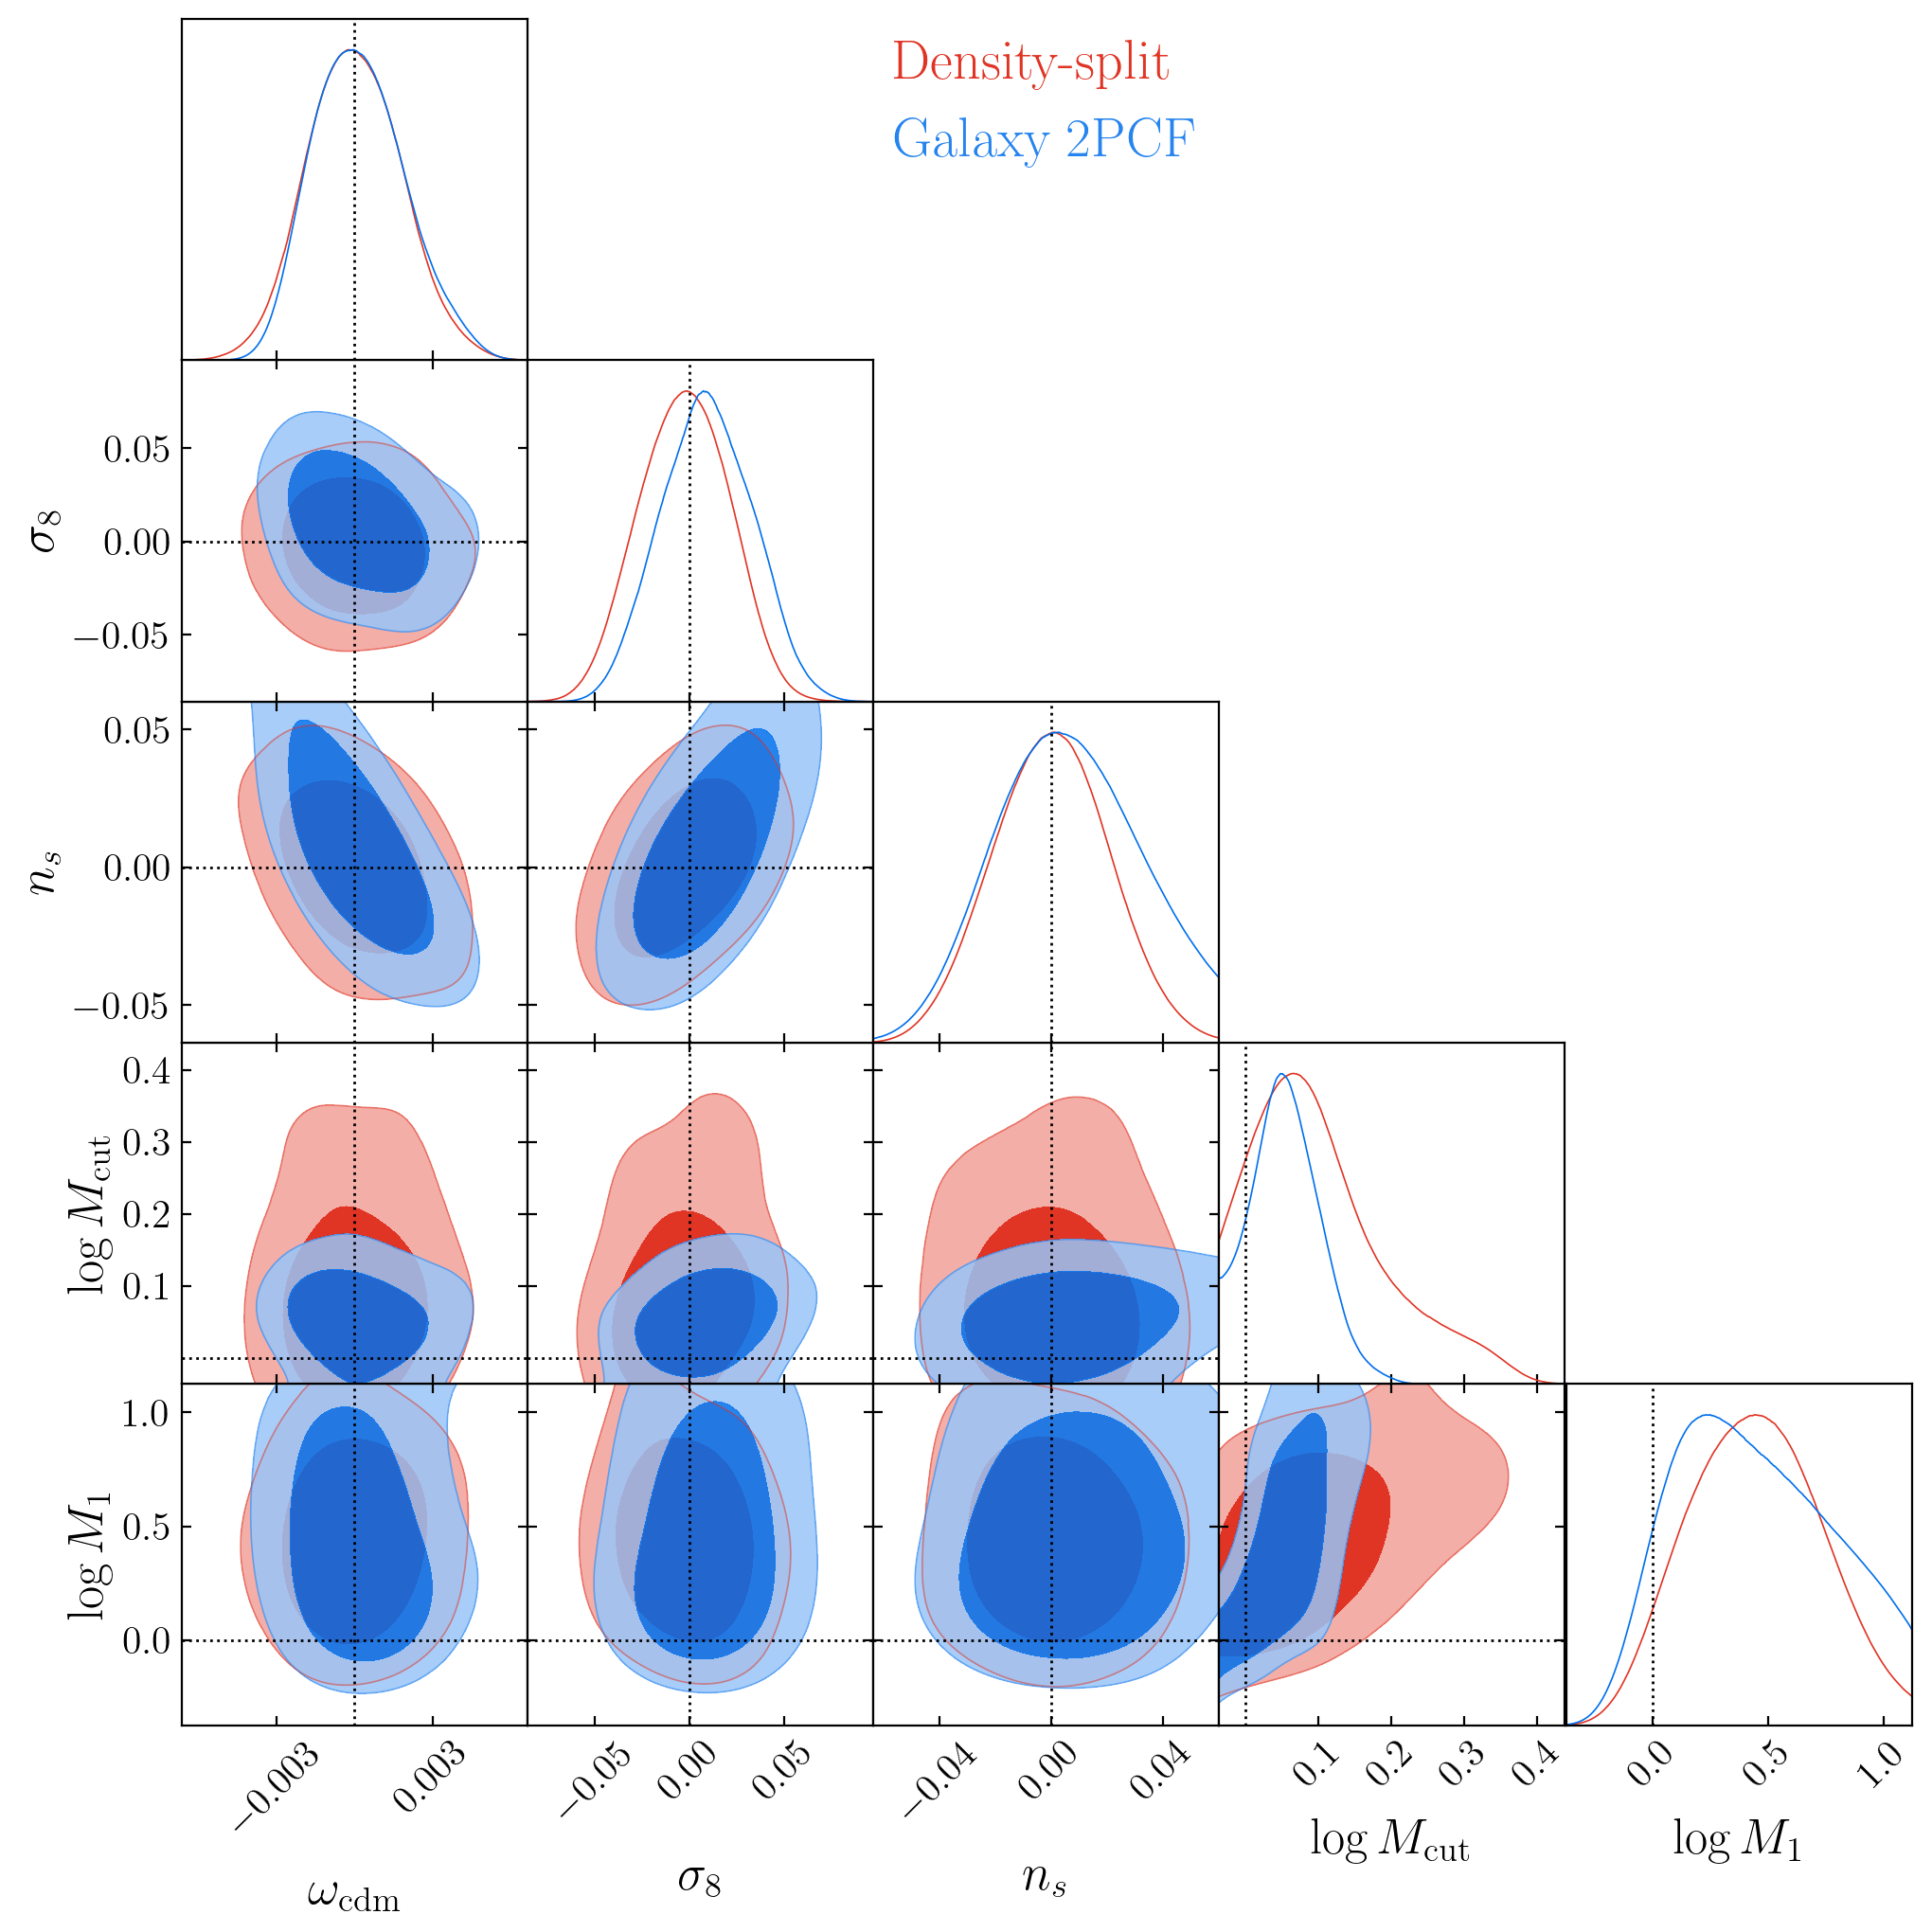

In [7]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM_1": r"\log M_1",
    "logM_cut": r"\log M_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "A_cen": r"A_{\rm cen}",
    "A_sat": r"A_{\rm sat}",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "s": r"$s$",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

idx_fit = 30

chains = []

truth = dict(zip(lhc_x_names, lhc_x[idx_fit]))

data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/minimal/dsc_conf/posterior_cosmo+hod_idx{idx_fit}.npy'
data = np.load(data_fn, allow_pickle=True).item()
print(data['names'])
for key, value in data['ranges'].items():
    data['ranges'][key] = value - truth[key]
    # data['ranges'][key] = value
chains.append(
    MCSamples(
            samples=data['samples']  - [truth[name] for name in data['names']],
            # samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[labels[n] for n in data['names']],
        )
)

data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/minimal/tpcf/posterior_cosmo+hod_idx{idx_fit}.npy'
data = np.load(data_fn, allow_pickle=True).item()
print(data['names'])
for key, value in data['ranges'].items():
    data['ranges'][key] = value - truth[key]
    # data['ranges'][key] = value
chains.append(
    MCSamples(
            samples=data['samples']  - [truth[name] for name in data['names']],
            # samples=data['samples'],
            weights=data['weights'],
            names=data['names'],
            ranges=data['ranges'],
            labels=[labels[n] for n in data['names']],
        )
)


# data_fn = f'/global/homes/e/epaillas/code/acm/projects/emc/posterior_cosmo+hod_tpcf_idx{idx_fit}.npy'
# data = np.load(data_fn, allow_pickle=True).item()
# print(data['names'])

# for key, value in data['ranges'].items():
#     data['ranges'][key] = value - truth[key]
#     # data['ranges'][key] = value

# chains.append(
#     MCSamples(
#             samples=data['samples']  - [truth[name] for name in data['names']],
#             # samples=data['samples'],
#             weights=data['weights'],
#             names=data['names'],
#             ranges=data['ranges'],
#             labels=[labels[n] for n in data['names']],
#         )
# )
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 24
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 22
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=['Density-split', 'Galaxy 2PCF'],
    filled=True,
    # markers=dict(zip(lhc_x_names, lhc_x[idx_fit])),
    markers=dict(zip(lhc_x_names, np.zeros(len(lhc_x_names)))),
    params=['omega_cdm', 'sigma8_m', 'n_s', 'logM_cut', 'logM_1'],
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


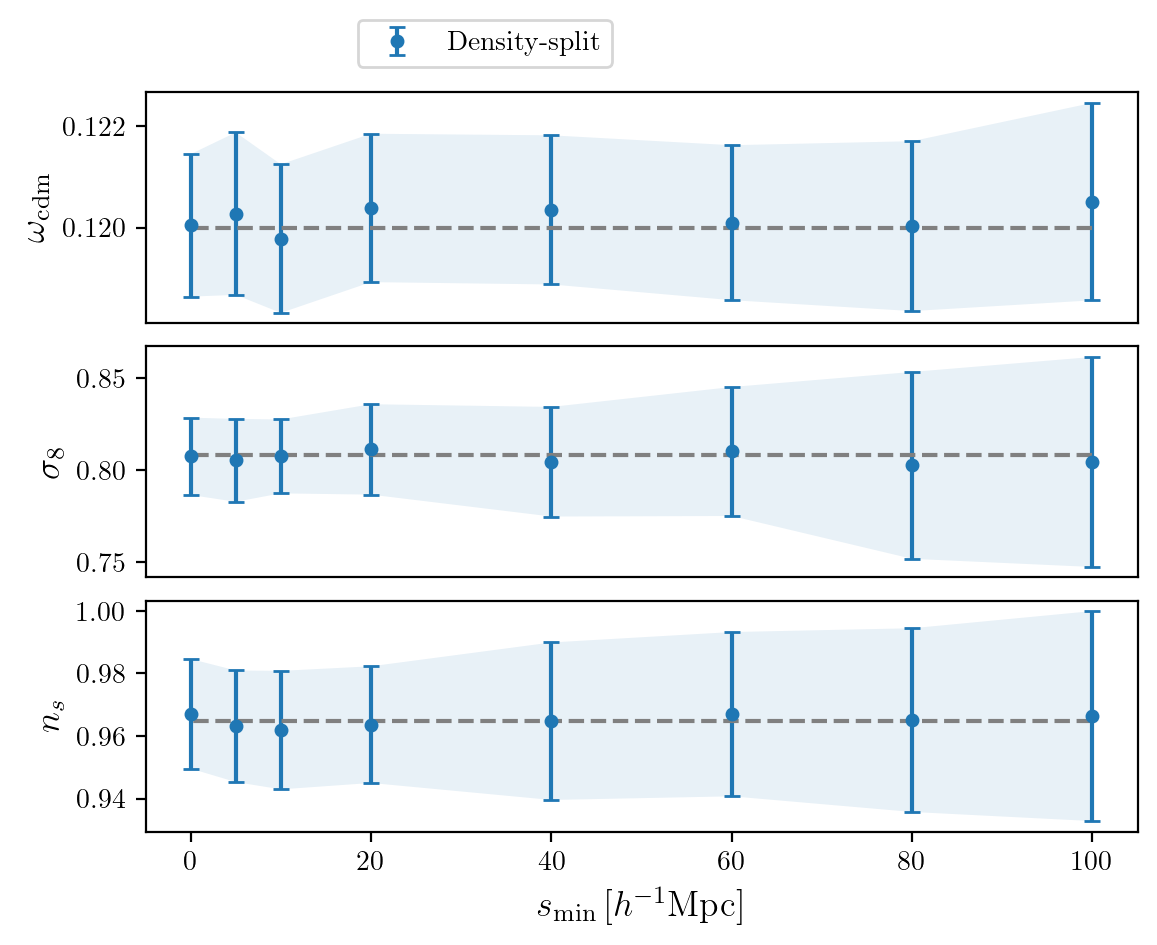

In [13]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'tpcf+dsc_conf': 'DSC + Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

chains = []

hod_idx = 30
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

# smins = np.array([0, 5, 10, 20, 40, 60])
smax = 152
smins = np.array([0, 5, 10, 20, 40, 60, 80, 100][::-1])

params = ['omega_cdm', 'sigma8_m', 'n_s']

fig, ax = plt.subplots(len(params), 1)

for istat, statistic in enumerate(['dsc_conf']):

    constraints = {}
    for param in params:
        constraints[param] = []

    for smin in smins:

        data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/aug9/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax{smax}.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        samples = MCSamples(
                    samples=data['samples'],
                    weights=data['weights'],
                    names=data['names'],
                    ranges=data['ranges'],
                    labels=[labels[n] for n in data['names']],
                )
        chains.append(samples)

        for param in params:
            constraints[param].append([samples.mean(param), samples.std(param)])

    for param in params:
        constraints[param] = np.asarray(constraints[param])


    for i, param in enumerate(params):
        ax[i].fill_between(smins, constraints[param][:, 0] - constraints[param][:, 1],
                           constraints[param][:, 0] + constraints[param][:, 1], alpha=0.1)
        ax[i].errorbar(smins + 1.5*istat, constraints[param][:, 0], constraints[param][:, 1],
                       marker='o', ls='', capsize=3, ms=4.0, label=labels_stats[statistic])
        ax[i].plot(smins, [truth[param]]*len(smins), ls='--', color='grey')

        ax[i].set_ylabel(labels[param], fontsize=13)
    
for aa in ax[:-1]:
    aa.axes.get_xaxis().set_visible(False)
    
ax[-1].set_xlabel(r'$s_{\rm min}\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].legend(bbox_to_anchor=(0.2, 1.05), ncols=2)
plt.subplots_adjust(hspace=0.1)
plt.show()
    

FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/e/epaillas/emc/posteriors/sep4/pk/posterior_cosmo+hod_idx30_smin0_smax152_kmin0.0_kmax0.2.npy'

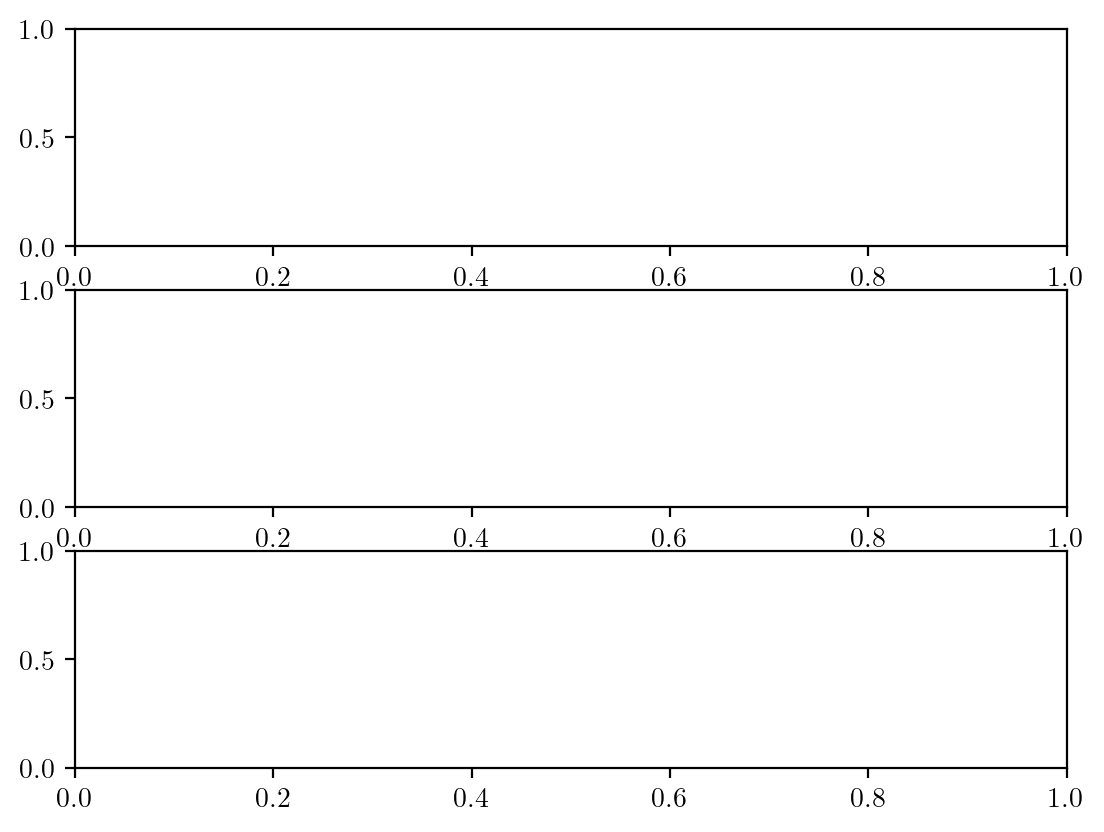

In [15]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'tpcf+dsc_conf': 'DSC + Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'number_density+pk': 'nbar + P(k)',
    'pk': 'P(k)',
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

chains = []

hod_idx = 30
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

# smins = np.array([0, 5, 10, 20, 40, 60])
smax = 152
smin = 0

kmin = 0.0
kmaxs = np.array([0.2, 0.4, 0.6, 0.8, 1.0])


params = ['omega_cdm', 'sigma8_m', 'n_s']

fig, ax = plt.subplots(len(params), 1)

for istat, statistic in enumerate(['pk']):

    constraints = {}
    for param in params:
        constraints[param] = []

    for kmax in kmaxs:

        data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/sep4/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax{smax}_kmin{kmin}_kmax{kmax}.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        samples = MCSamples(
                    samples=data['samples'],
                    weights=data['weights'],
                    names=data['names'],
                    ranges=data['ranges'],
                    labels=[labels[n] for n in data['names']],
                )
        chains.append(samples)

        for param in params:
            constraints[param].append([samples.mean(param), samples.std(param)])

    for param in params:
        constraints[param] = np.asarray(constraints[param])


    for i, param in enumerate(params):
        ax[i].fill_between(kmaxs, constraints[param][:, 0] - constraints[param][:, 1],
                           constraints[param][:, 0] + constraints[param][:, 1], alpha=0.1)
        ax[i].errorbar(kmaxs + 1.5*istat, constraints[param][:, 0], constraints[param][:, 1],
                       marker='o', ls='', capsize=3, ms=4.0, label=labels_stats[statistic])
        ax[i].plot(kmaxs, [truth[param]]*len(kmaxs), ls='--', color='grey')

        ax[i].set_ylabel(labels[param], fontsize=13)
    
for aa in ax[:-1]:
    aa.axes.get_xaxis().set_visible(False)
    
ax[-1].set_xlabel(r'$k_{\rm max}\,[h{\rm Mpc}^{-1}]$', fontsize=13)
ax[0].legend(bbox_to_anchor=(0.2, 1.05), ncols=2)
plt.subplots_adjust(hspace=0.1)
plt.show()
    

FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/e/epaillas/emc/posteriors/hmc/dsc_conf/posterior_cosmo+hod_idx30_smin0_smax152_kmin0.0_kmax1.0.npy'

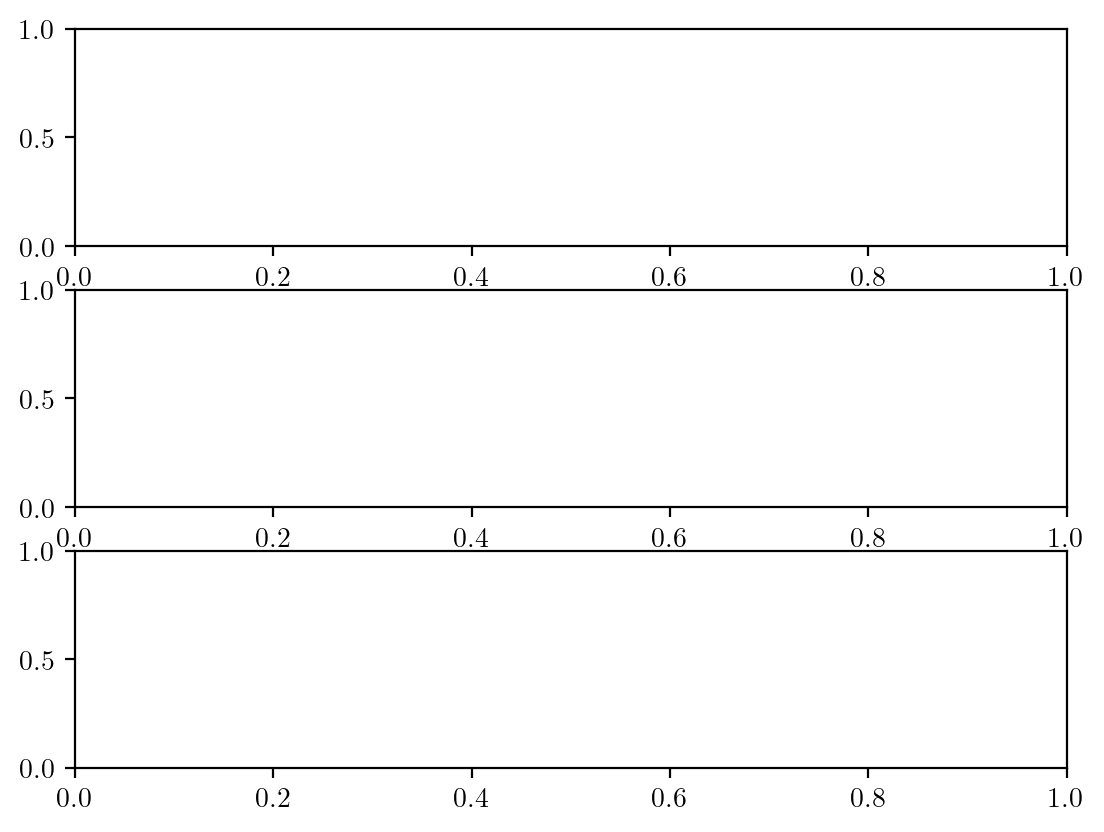

In [11]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'tpcf+dsc_conf': 'DSC + Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'number_density+pk': 'nbar + P(k)',
    'pk': 'P(k)',
}


# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']

chains = []

hod_idx = 30
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

smins = np.array([0, 5, 10, 20, 40, 60, 80, 100])
smax = 152
smin = 0

kmin = 0.0
kmax = 1.0


params = ['omega_cdm', 'sigma8_m', 'n_s']

fig, ax = plt.subplots(len(params), 1)

for istat, statistic in enumerate(['dsc_conf']):

    constraints = {}
    for param in params:
        constraints[param] = []

    for smin in smins:

        data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax{smax}_kmin{kmin}_kmax{kmax}.npy'
        data = np.load(data_fn, allow_pickle=True).item()
        samples = MCSamples(
                    samples=data['samples'],
                    weights=data['weights'],
                    names=data['names'],
                    ranges=data['ranges'],
                    labels=[labels[n] for n in data['names']],
                )
        chains.append(samples)

        for param in params:
            constraints[param].append([samples.mean(param), samples.std(param)])

    for param in params:
        constraints[param] = np.asarray(constraints[param])


    for i, param in enumerate(params):
        ax[i].fill_between(smins, constraints[param][:, 0] - constraints[param][:, 1],
                           constraints[param][:, 0] + constraints[param][:, 1], alpha=0.1)
        ax[i].errorbar(smins + 1.5*istat, constraints[param][:, 0], constraints[param][:, 1],
                       marker='o', ls='', capsize=3, ms=4.0, label=labels_stats[statistic])
        ax[i].plot(smins, [truth[param]]*len(smins), ls='--', color='grey')

        ax[i].set_ylabel(labels[param], fontsize=13)
    
for aa in ax[:-1]:
    aa.axes.get_xaxis().set_visible(False)
    
# ax[-1].set_xlabel(r'$k_{\rm max}\,[h{\rm Mpc}^{-1}]$', fontsize=13)
ax[0].legend(bbox_to_anchor=(0.2, 1.05), ncols=2)
plt.subplots_adjust(hspace=0.1)
plt.show()
    

Removed no burn in
Removed no burn in
Removed no burn in


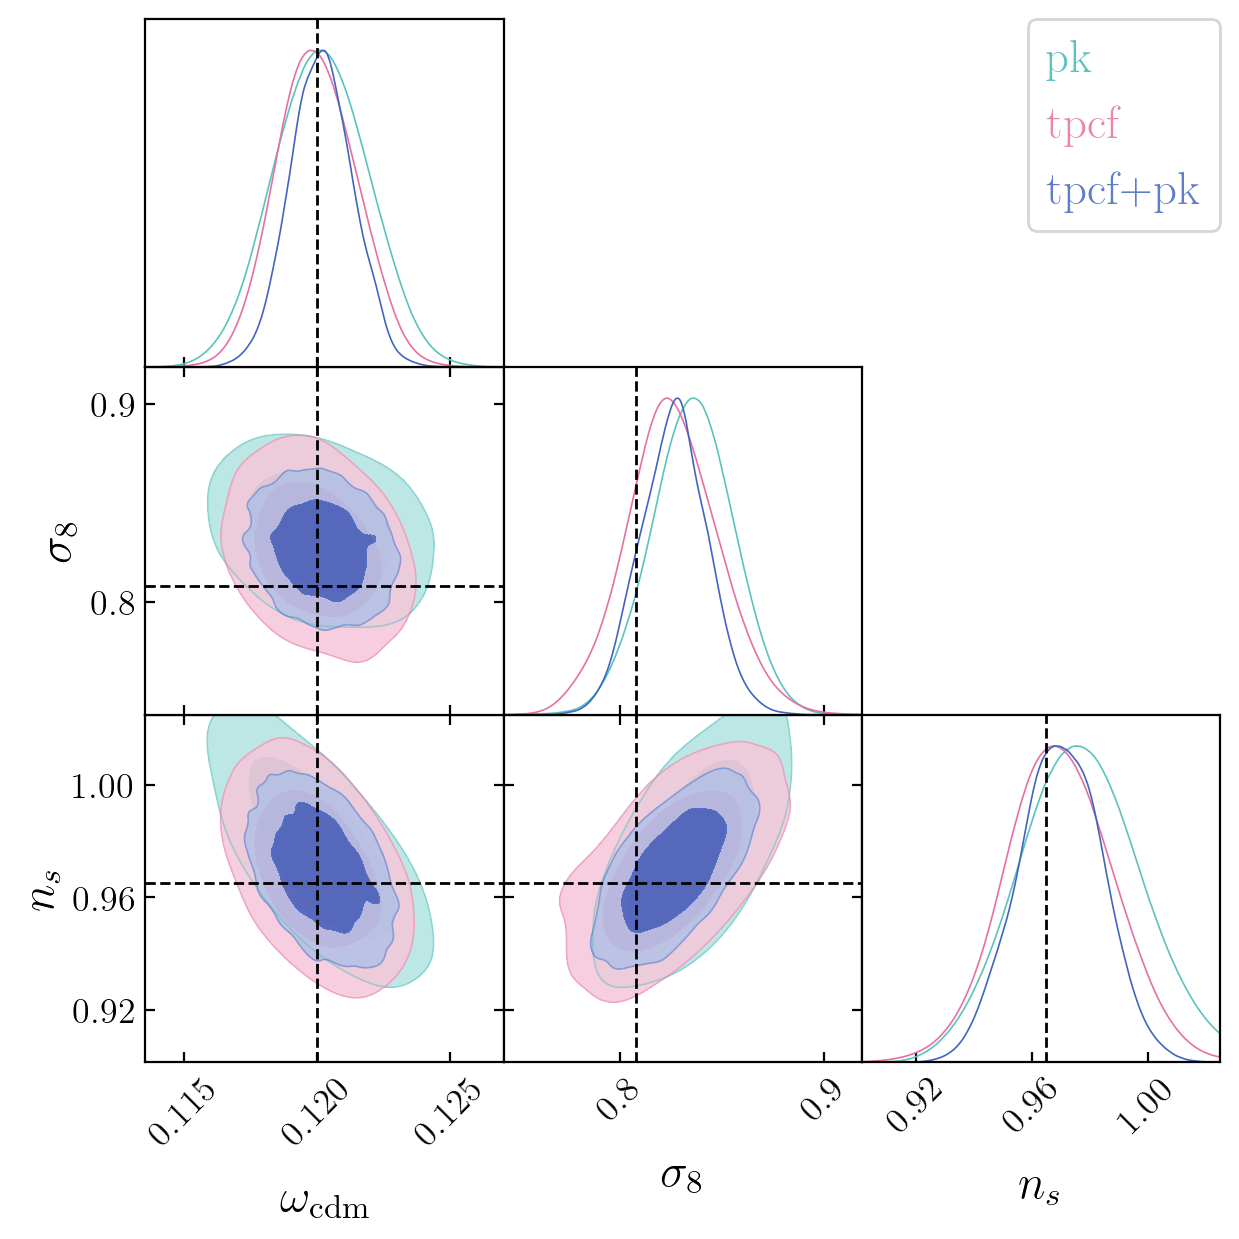

In [33]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
    'number_density+tpcf': 'nbar + Galaxy 2PCF',
    'tpcf+dsc_conf': 'Galaxy 2PCF + DSC',
}


chains = []

hod_idx = 30
smin = 0
kmin, kmax = 0.0, 1.0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['omega_cdm', 'sigma8_m', 'n_s']
statistics = ['pk', 'tpcf', 'tpcf+pk']

for istat, statistic in enumerate(statistics):
    
    data_dir = f'/pscratch/sd/e/epaillas/emc/posteriors/hmc/{statistic}/'
    data_fn = Path(data_dir) / f'posterior_cosmo+hod_idx{hod_idx}_smin{smin}_smax152_kmin{kmin}_kmax{kmax}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    legend_labels=[label for label in statistics],
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    filled=True,
    markers=truth,
    params=params,
    # title_limit=1,
    # params=['logM_cut', 'logM_1', 'sigma', 'kappa', 'alpha']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


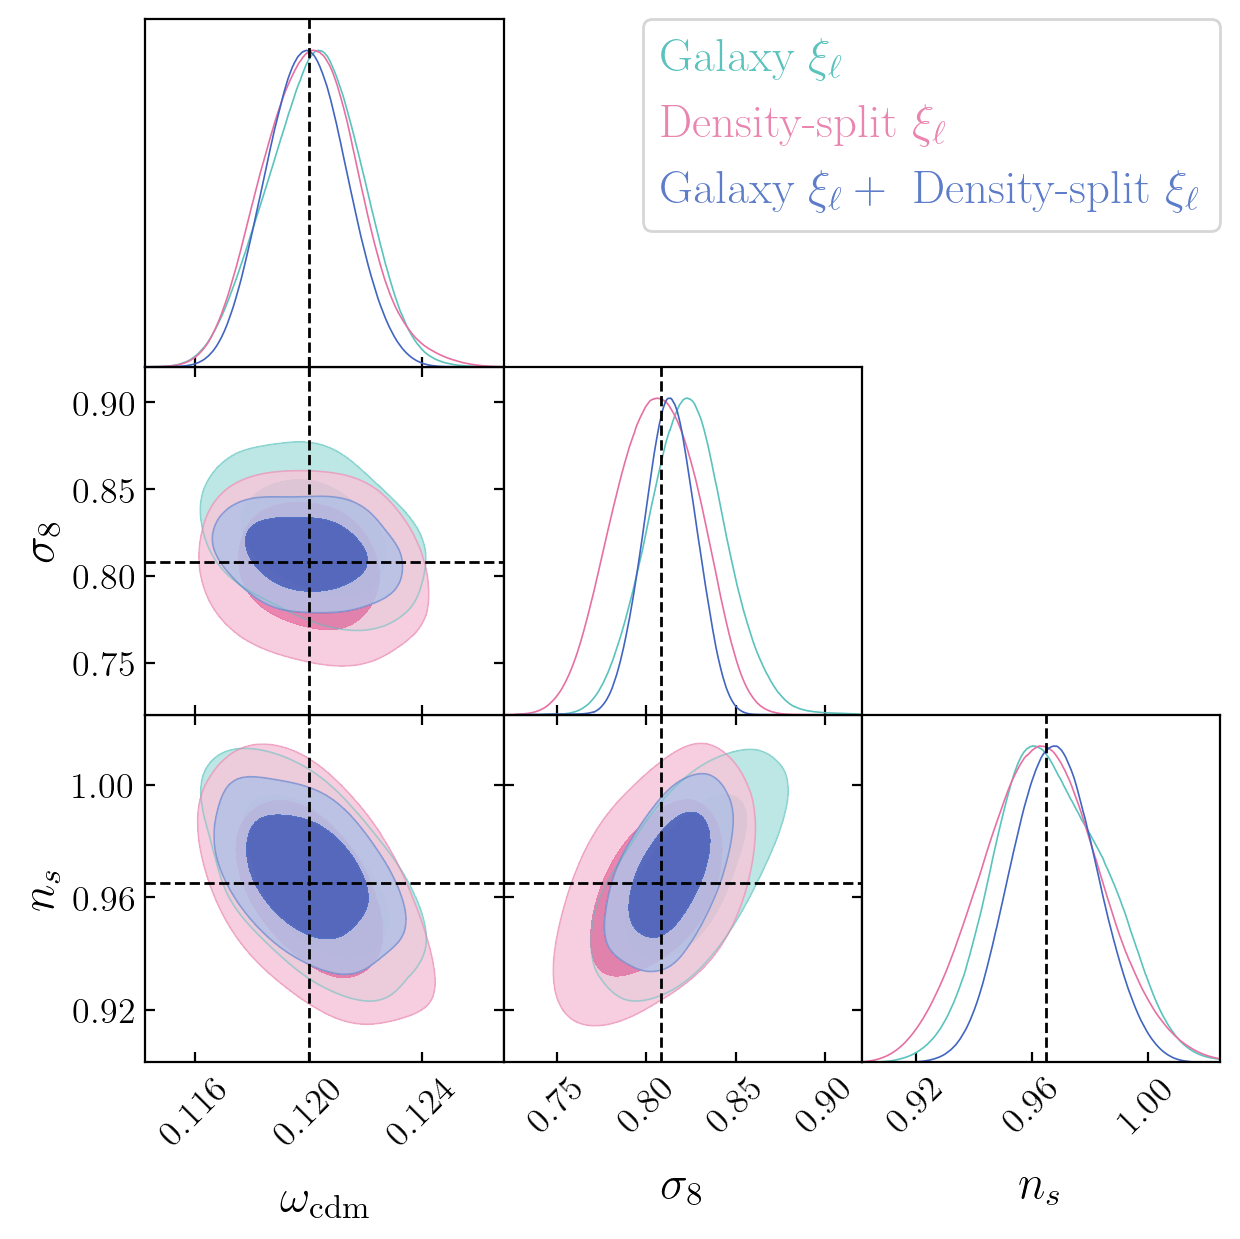

In [47]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
}


chains = []

hod_idx = 30
smin = 0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['omega_cdm', 'sigma8_m', 'n_s']
statistics = ['tpcf', 'dsc_conf', 'tpcf+dsc_conf']

for istat, statistic in enumerate(statistics):
    
    data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/asinh/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    # legend_labels=[labels_stats[stat] for stat in statistics],
    # legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    legend_labels=[r'$\textrm{ Galaxy }\xi_\ell$', r'$\textrm{ Density-split }\xi_\ell$', r'$\textrm{ Galaxy }\xi_\ell + \textrm{ Density-split }\xi_\ell$'],
    filled=True,
    markers=truth,
    params=params,
    # title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


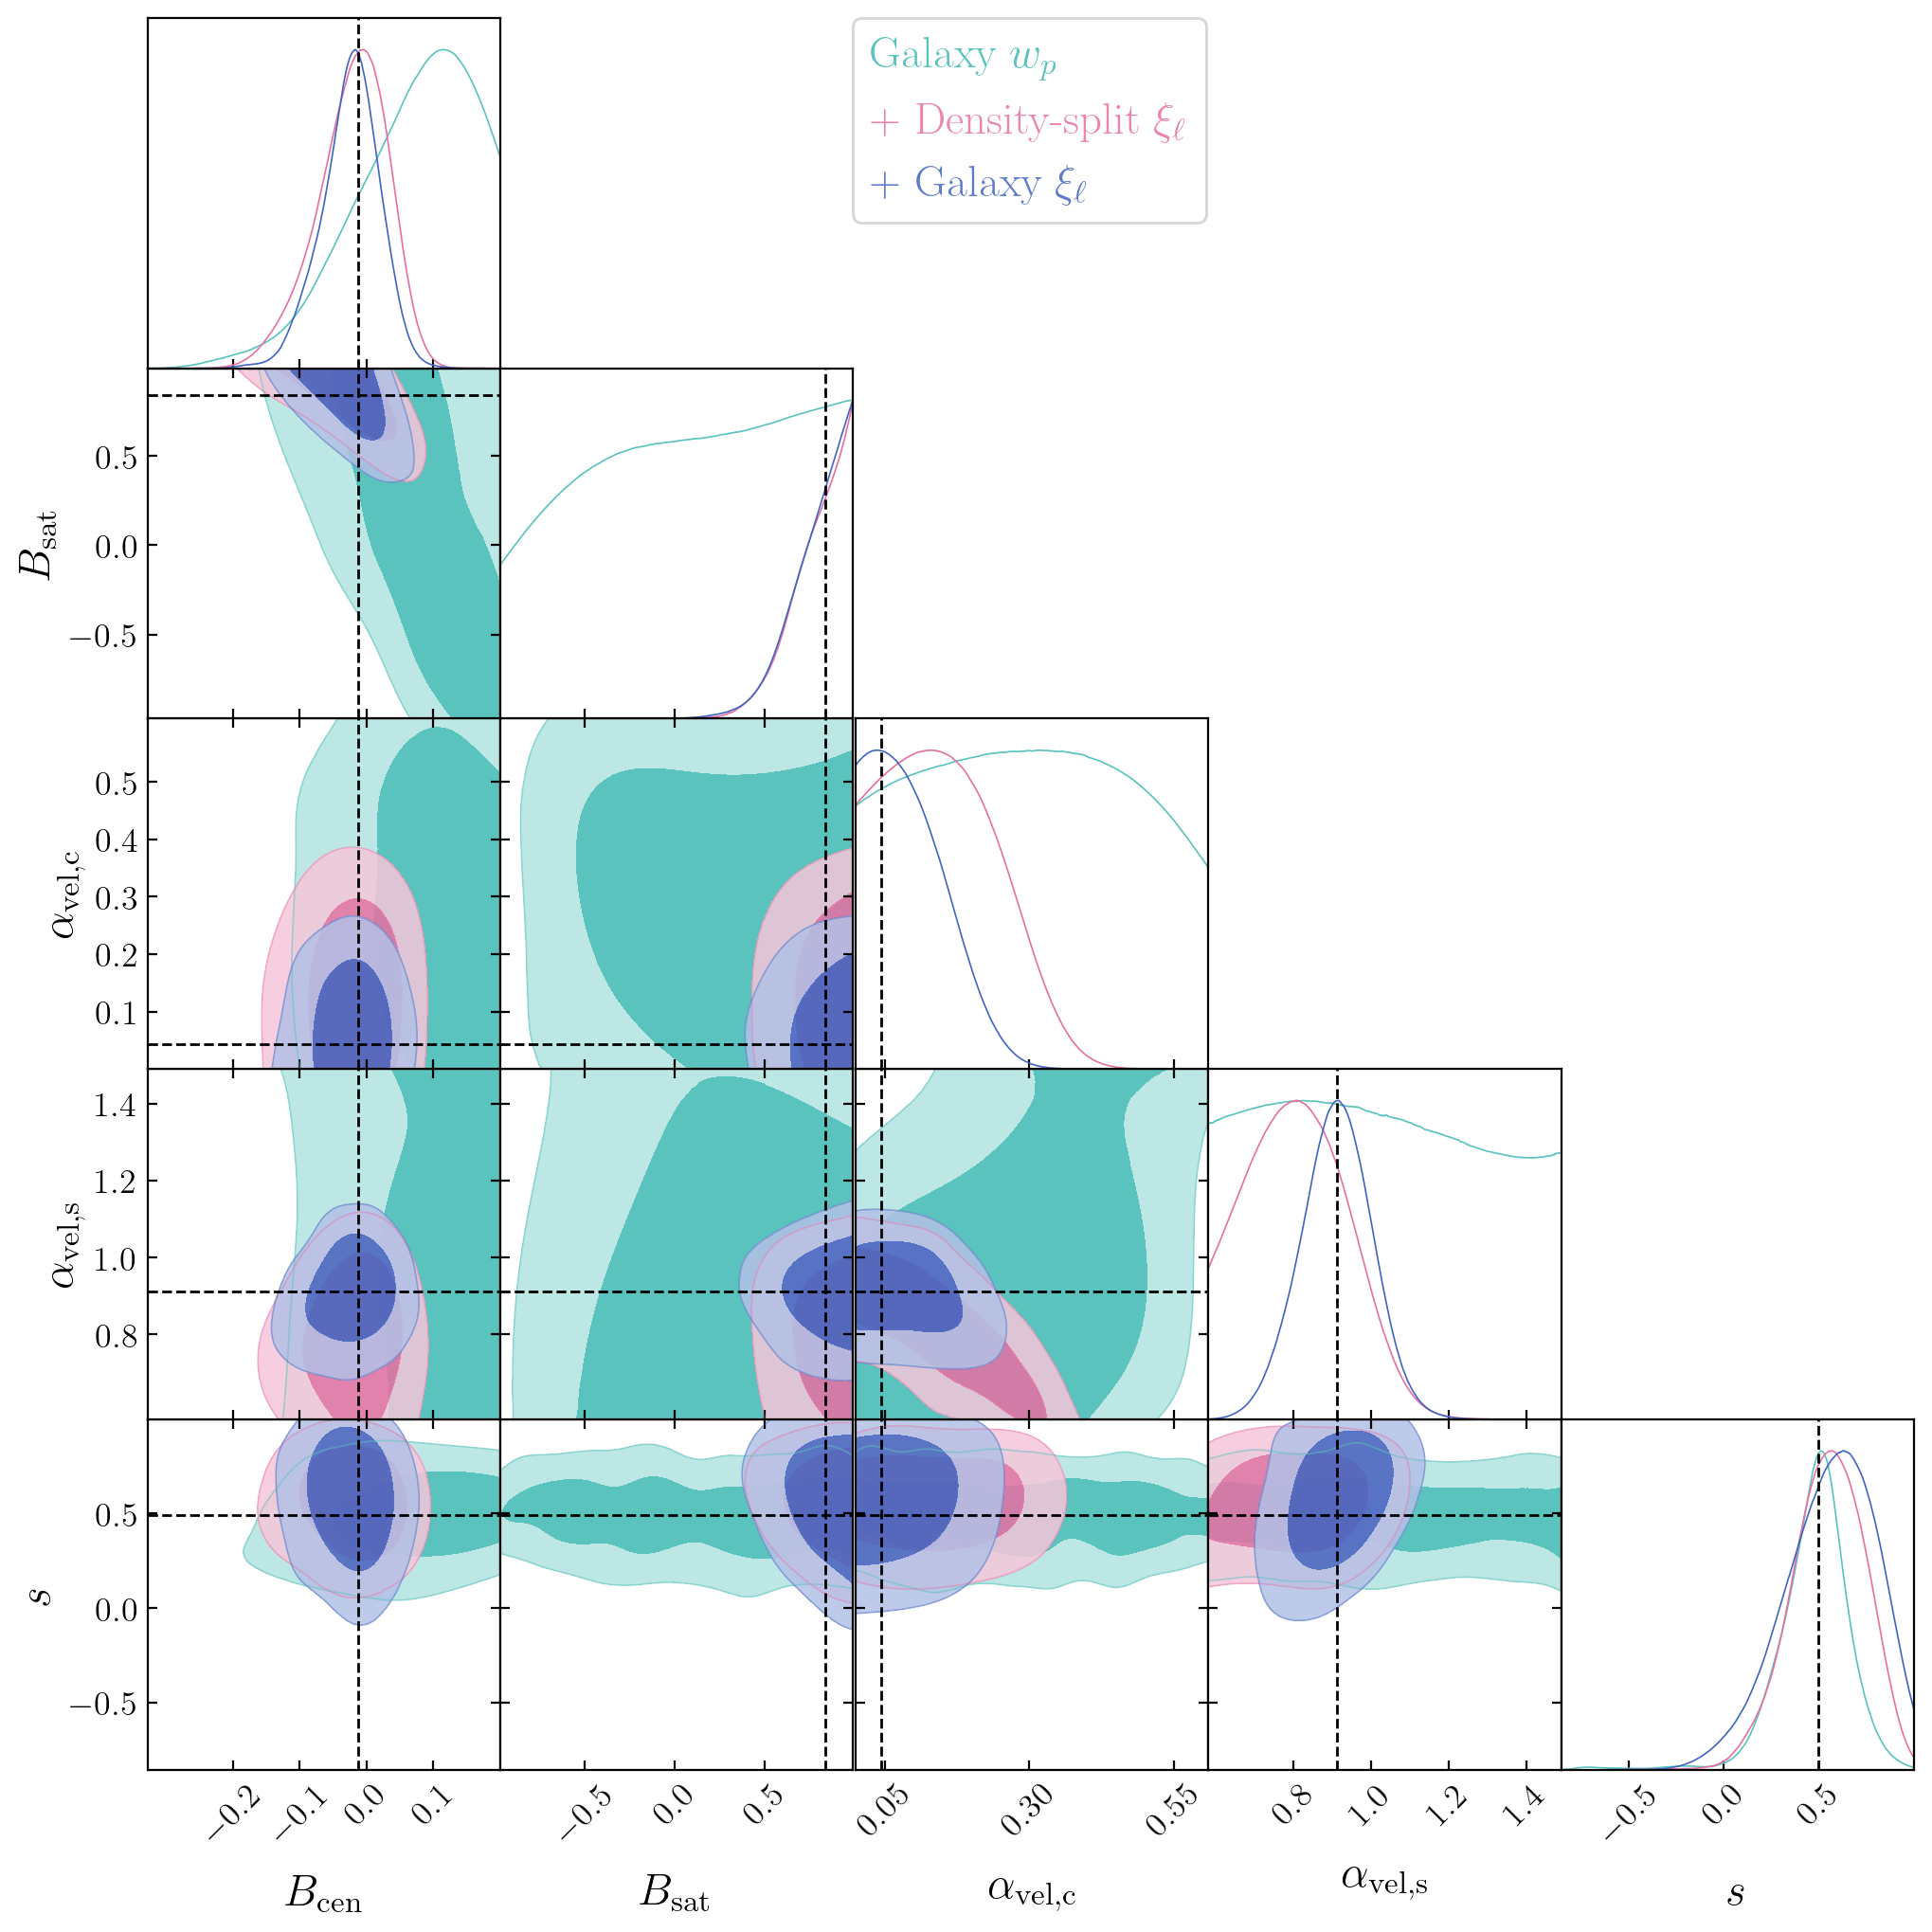

In [170]:
labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
}


chains = []

hod_idx = 330
smin = 0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['B_cen', 'B_sat', 'alpha_c', 'alpha_s', 's']
statistics = ['wp', 'wp+dsc_conf', 'wp+dsc_conf+tpcf']

for istat, statistic in enumerate(statistics):

    data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/minimal/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    # legend_labels=[labels_stats[stat] for stat in statistics],
    legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    filled=True,
    markers=truth,
    params=params,
    # title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Removed no burn in
Removed no burn in
Removed no burn in


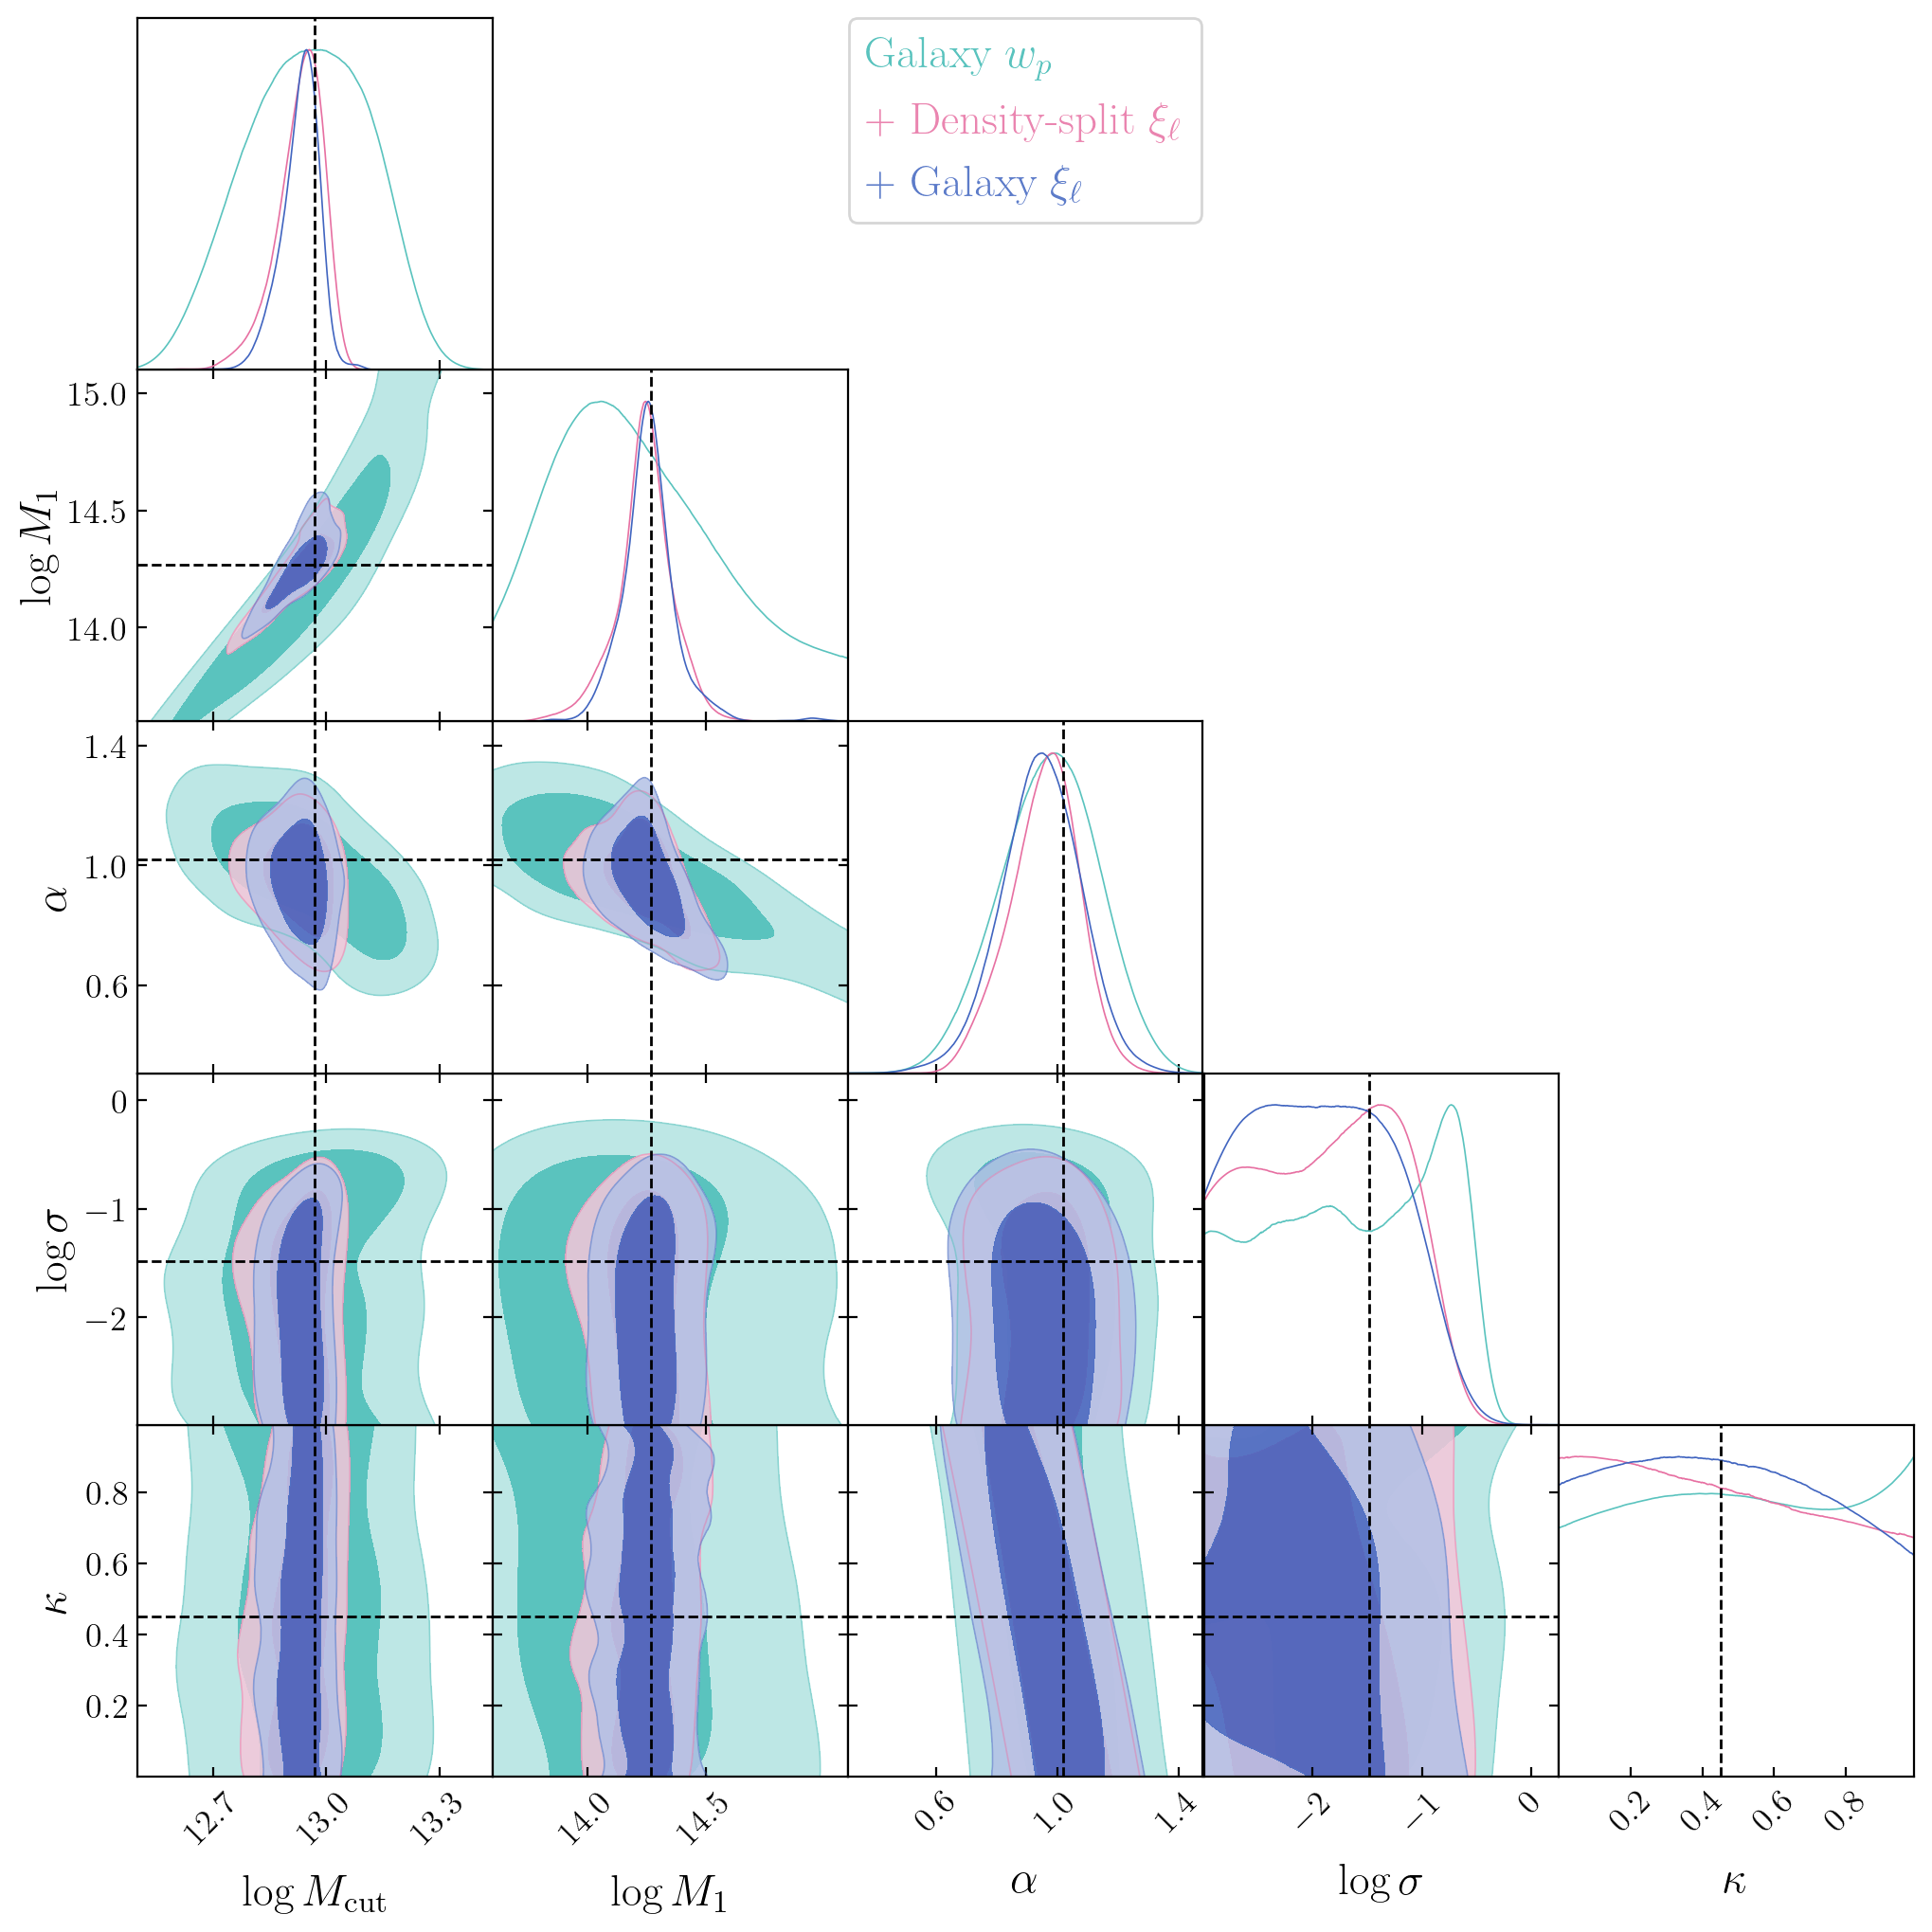

In [171]:
labels = {
    "omega_b": r"$\omega_{\rm b}$",
    "omega_cdm": r"$\omega_{\rm cdm}$",
    "sigma8_m": r"$\sigma_8$",
    "n_s": r"$n_s$",
    "nrun": r"$\alpha_s$",
    "N_ur": r"$N_{\rm ur}$",
    "w0_fld": r"$w_0$",
    "wa_fld": r"$w_a$",
    "logM_1": r"$\log M_1$",
    "logM_cut": r"$\log M_{\rm cut}$",
    "alpha": r"$\alpha$",
    "alpha_s": r"$\alpha_{\rm vel, s}$",
    "alpha_c": r"$\alpha_{\rm vel, c}$",
    "sigma": r"$\log \sigma$",
    "kappa": r"$\kappa$",
    "A_cen": r"$A_{\rm cen}$",
    "A_sat": r"$A_{\rm sat}$",
    "B_cen": r"$B_{\rm cen}$",
    "B_sat": r"$B_{\rm sat}$",
    "s": r"$s$",
    "fsigma8": r"$f \sigma_8$",
    "Omega_m": r"$\Omega_{\rm m}$",
    "H0": r"$H_0$",
}

labels_stats = {
    'wp': r'$\textrm{Galaxy } w_p$',
    'dsc_conf': 'Density-split',
    'dsc_conf_cross': 'Density-split (CCF)',
    'tpcf': 'Galaxy 2PCF',
}


chains = []

hod_idx = 330
smin = 0
truth = dict(zip(lhc_x_names, lhc_x[hod_idx]))

params = ['logM_cut', 'logM_1', 'alpha', 'sigma', 'kappa']
statistics = ['wp', 'wp+dsc_conf', 'wp+dsc_conf+tpcf']

for istat, statistic in enumerate(statistics):

    data_fn = f'/pscratch/sd/e/epaillas/emc/posteriors/minimal/{statistic}/posterior_cosmo+hod_idx{hod_idx}_smin{smin}.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    samples = MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    chains.append(samples)


g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = "--"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = True
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6
g.settings.solid_colors = ['#4165c0', '#e770a2', '#5ac3be', '#696969', '#f79a1e', '#ba7dcd']

g.triangle_plot(
    roots=chains,
    # legend_labels=[labels_stats[stat] for stat in statistics],
    legend_labels=[r'$\textrm{Galaxy } w_p$', r'$+ \textrm{ Density-split }\xi_\ell$', r'$+ \textrm{ Galaxy }\xi_\ell$'],
    filled=True,
    markers=truth,
    params=params,
    # title_limit=1,
    # params=['logM_cut', 'logM_1']
    # legend_labels=stats
)
plt.show()
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

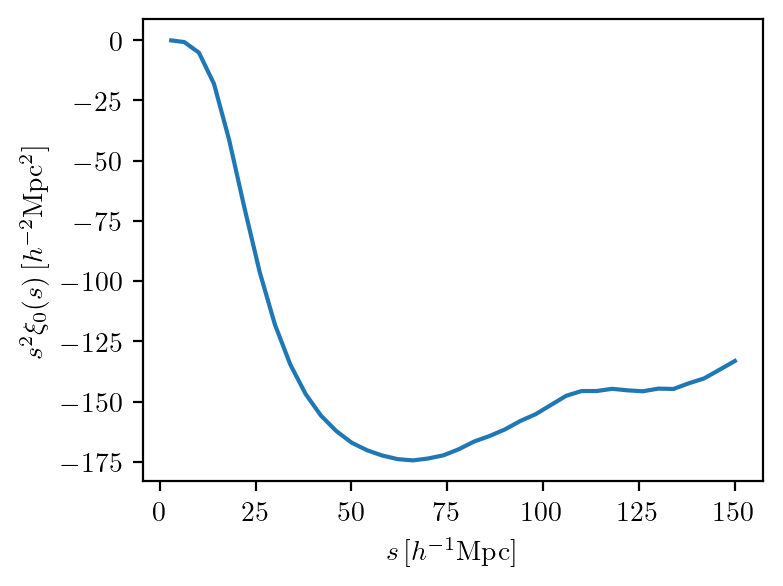

In [22]:
# test = lhc_y.reshape(len(lhc_y), 2, 4, 2, -1)

# fig, ax = plt.subplots()

# for q in range(4):
#     ax.plot(s, s**2*test[466
#                          , 0, q, 0])
# plt.show()

filters = {
    'multipoles': [2],
    'quantiles': [4],
    'statistics': ['quantile_data_correlation'],
}

with torch.no_grad():
    pred_test_y = model.get_prediction(torch.Tensor(lhc_test_x), filters=filters)
    pred_test_y = pred_test_y.numpy()
    
pred_test_y.shape

fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(s, s**2*pred_test_y[30])
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.show()
plt.show()

In [15]:
model.coordinates

{'statistics': ['quantile_data_correlation', 'quantile_correlation'],
 'quantiles': [0, 1, 3, 4],
 'multipoles': [0, 2],
 's': array([  2.97618985,   6.38379852,  10.21022279,  14.13234602,
         18.0888502 ,  22.064387  ,  26.05184366,  30.04670527,
         34.04575315,  38.04389618,  42.04536757,  46.04456039,
         50.04332445,  54.0420691 ,  58.04254646,  62.04072787,
         66.03786621,  70.03657653,  74.03500126,  78.03401875,
         82.03229655,  86.02976543,  90.02905195,  94.0278186 ,
         98.02680596, 102.02539098, 106.02500316, 110.02380464,
        114.02306756, 118.02220515, 122.02170433, 126.02117028,
        130.02050668, 134.01986291, 138.01949061, 142.01898965,
        146.01843901, 150.01775331])}